# Trips



In [2]:
import pandas as pd
import numpy as np
import data_source as ds


data_source.py loaded


In [261]:
trip = ds.loadDataset('trip');
print("There are %d bike trips made in 2013-2015" % ( len(trip) ))

There are 669959 bike trips made in 2013-2015


In [262]:
stations= ds.loadDataset('station')
print("We have %d stations" % (stations.shape[0]))

We have 70 stations


In [263]:
stations.set_index("id")
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [264]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


Is __id__ column unique?

In [265]:
len(trip['id'].unique()) == trip['id'].count()

True

In [214]:
trip.set_index('id');

In [266]:
trip['start_date'] = pd.to_datetime(trip['start_date'], dayfirst=True);
trip['end_date'] = pd.to_datetime(trip['end_date'], dayfirst=True);
trip.head()

id  duration          start_date        start_station_name  \
0  4576        63 2013-08-29 14:13:00  South Van Ness at Market   
1  4607        70 2013-08-29 14:42:00        San Jose City Hall   
2  4130        71 2013-08-29 10:16:00   Mountain View City Hall   
3  4251        77 2013-08-29 11:29:00        San Jose City Hall   
4  4299        83 2013-08-29 12:02:00  South Van Ness at Market   

   start_station_id            end_date          end_station_name  \
0                66 2013-08-29 14:14:00  South Van Ness at Market   
1                10 2013-08-29 14:43:00        San Jose City Hall   
2                27 2013-08-29 10:17:00   Mountain View City Hall   
3                10 2013-08-29 11:30:00        San Jose City Hall   
4                66 2013-08-29 12:04:00            Market at 10th   

   end_station_id  bike_id subscription_type zip_code  
0              66      520        Subscriber    94127  
1              10      661        Subscriber    95138  
2              27       48        Subscriber    97214  
3              10       26        Subscriber    95060  
4              67      319        Subscriber    94103

In [216]:
# we have 700 bikes around san fransisco
trip.bike_id.unique().size


700

What is this "zip_code" column?

### Insights
Whan insights can can we extract just from this data?
1. We have bike ids for each trip. We can find long multi station trips per bike.  
    __a.__  Longest trips for some bike per day.  
    __b.__  Bikes from max ammount of stations visiting some station. When? What station? What happened there on that day?  
2. We can find trips which start in stations, which are not the end location of prvious bike trip. This is an event of maintainer moving the bike between stations. (If the last trip was not today or yesterday - the bike might have been maintained/repaired).
3.  Together with stations data set: Use http://geopandas.org/gallery/index.html  
  
___P.S.___  
What behaviour would we expect if some bike is broken, or in a bad condition?
*  There will be less or no trips for this bike.
*  At least Subscribers would start a trip (take the bike), notice that it is in a bad condition and return it (finish the trip). Such trips are very short and start and stop in the same station.
    

1.  Get a General high level picture of number of trips in the years 2013-2015
2.  Duration of trips per pair of stations by months and years- visualize
    __a.__ consider adding length of trip from google map
2.  *short trips of 1 or two minutes that start and end at the same station can indicate that the bikes are broken
3.  "Peak" uses of the bike by:<br>
     __a.__ busiest hours in the day<br>
     __b.__ compare weekdays to weekends<br>
     __c.__ compare seaons of the year( check use by month)<br>

5.  Popular routes: <br>
     __a.__ compare routes between cities <br>
     __b.__ compare routes between stations


## Number of trips

In [267]:
#find the year and month of each trip and duration in minutes:
trip['duration_minutes']=(trip["end_date"]-trip["start_date"]).dt.seconds/60
trip['year']=trip["end_date"].dt.year
trip["month"]=trip["end_date"].dt.month #strftime('%b') # present the months as string
trip['week_day']=trip["end_date"].dt.dayofweek

In [268]:
trip.head()

id  duration          start_date        start_station_name  \
0  4576        63 2013-08-29 14:13:00  South Van Ness at Market   
1  4607        70 2013-08-29 14:42:00        San Jose City Hall   
2  4130        71 2013-08-29 10:16:00   Mountain View City Hall   
3  4251        77 2013-08-29 11:29:00        San Jose City Hall   
4  4299        83 2013-08-29 12:02:00  South Van Ness at Market   

   start_station_id            end_date          end_station_name  \
0                66 2013-08-29 14:14:00  South Van Ness at Market   
1                10 2013-08-29 14:43:00        San Jose City Hall   
2                27 2013-08-29 10:17:00   Mountain View City Hall   
3                10 2013-08-29 11:30:00        San Jose City Hall   
4                66 2013-08-29 12:04:00            Market at 10th   

   end_station_id  bike_id subscription_type zip_code  duration_minutes  year  \
0              66      520        Subscriber    94127               1.0  2013   
1              10      661        Subscriber    95138               1.0  2013   
2              27       48        Subscriber    97214               1.0  2013   
3              10       26        Subscriber    95060               1.0  2013   
4              67      319        Subscriber    94103               2.0  2013   

   month  week_day  
0      8         3  
1      8         3  
2      8         3  
3      8         3  
4      8         3

In [219]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
from pylab import *

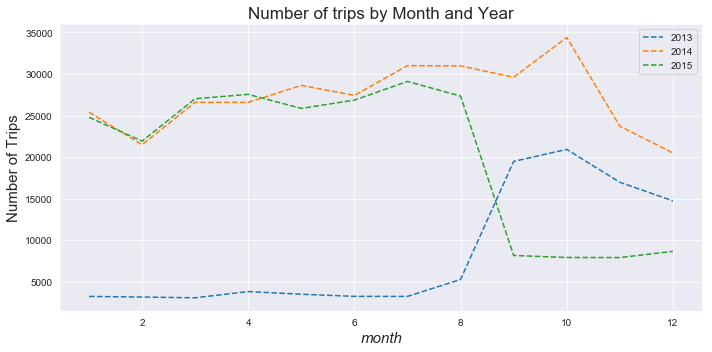

In [269]:
#how many trips did we have each month for the years 2013=2015
fig=plt.figure(figsize=(10,5))
ax = plt.axes()
sns.set_style("darkgrid")
plt.xlabel("Month", fontstyle="italic", fontsize=15)
plt.ylabel("Number of Trips", fontsize=15)
plt.title("Number of trips by Month and Year",fontsize=17)
trip[trip.year==2013].groupby('month').size().plot(legend=True,label="2013",linestyle='dashed')
trip[trip.year==2014].groupby('month').size().plot(legend=True,label='2014',linestyle='dashed')
trip[trip.year==2015].groupby('month').size().plot(legend=True,label="2015",linestyle='dashed')
plt.tight_layout()


Let's take a look at the trip duration in minutes to find problematic values
we see the min in 0 

In [270]:
trip["duration_minutes"].value_counts().sort_index()

0.0           1
1.0        2084
2.0       10621
3.0       30530
4.0       53220
5.0       57691
6.0       58882
7.0       59084
8.0       56628
9.0       51940
10.0      45960
11.0      39643
12.0      33259
13.0      27163
14.0      21745
15.0      17391
16.0      13585
17.0      10544
18.0       8174
19.0       6406
20.0       5075
21.0       4300
22.0       3797
23.0       3203
24.0       2957
25.0       2593
26.0       2331
27.0       2084
28.0       1818
29.0       1526
          ...  
1406.0        3
1407.0        3
1408.0        3
1409.0        3
1410.0        2
1411.0        2
1412.0        1
1413.0        4
1414.0        2
1415.0        3
1416.0        2
1417.0        3
1418.0        1
1421.0        4
1422.0        3
1423.0        2
1424.0        3
1426.0        2
1427.0        1
1428.0        3
1429.0        2
1430.0        3
1431.0        3
1432.0        2
1433.0        3
1434.0        2
1435.0        1
1436.0        4
1437.0        1
1439.0        2
Name: duration_minutes, 

We have 1 entry with duration zero that we can exclude. what is intersting are the bikes that had duration trip of 1 or 2 minutes and have identical start_station and end_station. This could mean that the bikes are broken since the user returned them right away

In [271]:
#numbe of trips with 1 or 2 minutes duration that started and ended at the same station 
suspicious_broken_bikes=trip[((trip.duration_minutes==2)|(trip.duration_minutes==1)) & (trip.start_station_id==trip.end_station_id)][["week_day","month","year","duration_minutes","bike_id"]]
suspicious_broken_bikes.groupby(["year","month"]).size().unstack
suspicious_broken_bikes["bike_id"].value_counts()

598    13
520    13
546    13
372    11
619    11
471    11
530    11
622    10
566    10
292    10
614    10
528    10
470    10
468    10
429    10
420     9
447     9
267     9
321     9
634     9
589     9
418     9
515     9
624     9
282     8
329     8
555     8
625     8
464     8
513     8
       ..
185     1
180     1
178     1
177     1
175     1
168     1
161     1
217     1
228     1
681     1
258     1
272     1
682     1
684     1
268     1
688     1
263     1
262     1
693     1
254     1
236     1
253     1
252     1
249     1
248     1
241     1
239     1
694     1
237     1
9       1
Name: bike_id, Length: 564, dtype: int64

## Durations of the bike trips by years 
75% of trips lasted between 1 and 13 minute. Average time of a trip is 17 minutes

C:\Users\rache\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


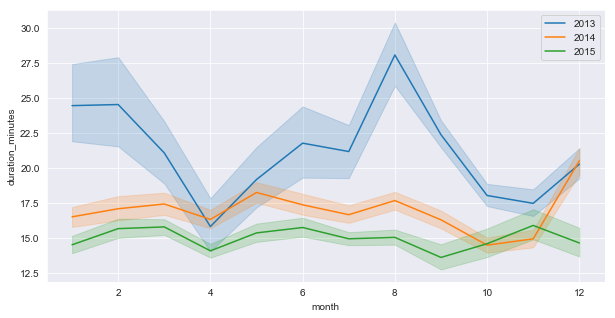

In [272]:

sns.set_style("darkgrid")
sns.lineplot(x="month",y="duration_minutes",data=trip[(trip.year==2013) & (trip.duration_minutes>1)], label="2013")
sns.lineplot(x="month",y="duration_minutes",data=trip[(trip.year==2014) & (trip.duration_minutes>1)],label="2014")
sns.lineplot(x="month",y="duration_minutes",data=trip[(trip.year==2015)&(trip.duration_minutes>1)], label="2015")

### Frequecncy of Trips by duration for 2013-2015 for all user types

In [633]:
# first let's check how many trips were taken by subscribers vs. non subscribers
counts=trip['subscription_type'].value_counts()
print("{} % of te trips are done by subscribers and {} % by costumers".format(np.around(100*counts['Subscriber']/len(trip),3),np.around(100*counts['Customer']/len(trip),3)))

84.594 % of te trips are done by subscribers and 15.406 % by costumers


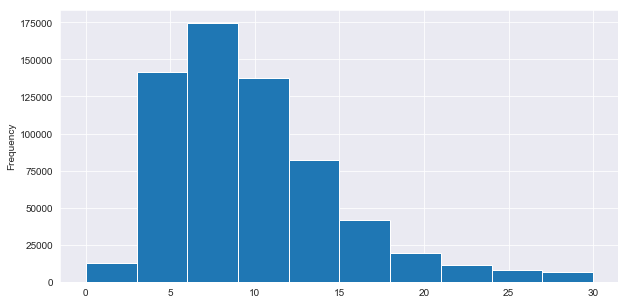

In [611]:
fig=plt.figure(figsize=(10,5))
trip_duration=trip["duration_minutes"].sort_values()
trip_duration[trip_duration<trip_duration.quantile(.95)].plot(kind='hist')

### Is there any difference between subscribers and costumers when it comes to trips duration?
It looks likes non subscribers take trips that lasts minimum 20 minutes

subscription_type
Customer      AxesSubplot(0.125,0.125;0.775x0.755)
Subscriber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_minutes, dtype: object

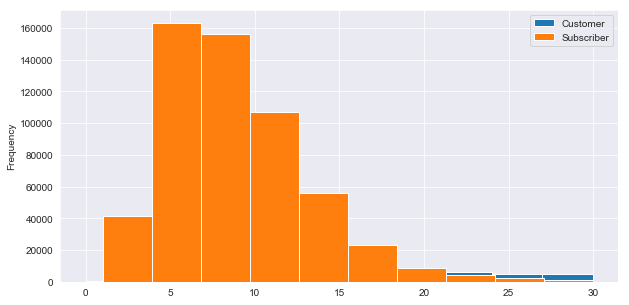

In [618]:
trip[trip.duration_minutes<trip.duration_minutes.quantile(.95)].groupby('subscription_type')['duration_minutes'].plot(kind='hist',figsize=(10,5) ,stacked=True, legend=True)

## Stations locations and popular routes 
There are 700 stations scattered in 5 cities. San Fransico had the larget number of stations- 35

In [274]:
stations.city.unique() # The stations are scattered  5 cities 

array(['San Jose', 'Redwood City', 'Mountain View', 'Palo Alto',
       'San Francisco'], dtype=object)

In [275]:
stations.groupby('city').size()

city
Mountain View     7
Palo Alto         5
Redwood City      7
San Francisco    35
San Jose         16
dtype: int64

In [276]:
import folium as folium

In [576]:
map = folium.Map(location=[37.773972, -121.867905], zoom_start=8)


In [577]:
stations.apply(lambda row:folium.Marker([row["lat"], row["long"]],popup=row["name"]).add_to(map),axis=1,)
map

In [366]:
stations.name.unique().shape

(70,)

In [280]:
stations=stations.set_index("id")

In [281]:
stations.head()

name        lat        long  dock_count  \
id                                                                         
2   San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
3               San Jose Civic Center  37.330698 -121.888979          15   
4              Santa Clara at Almaden  37.333988 -121.894902          11   
5                    Adobe on Almaden  37.331415 -121.893200          19   
6                    San Pedro Square  37.336721 -121.894074          15   

        city installation_date  
id                              
2   San Jose          8/6/2013  
3   San Jose          8/5/2013  
4   San Jose          8/6/2013  
5   San Jose          8/5/2013  
6   San Jose          8/7/2013

In [428]:
trip.head()

id  duration          start_date        start_station_name  \
0  4576        63 2013-08-29 14:13:00  South Van Ness at Market   
1  4607        70 2013-08-29 14:42:00        San Jose City Hall   
2  4130        71 2013-08-29 10:16:00   Mountain View City Hall   
3  4251        77 2013-08-29 11:29:00        San Jose City Hall   
4  4299        83 2013-08-29 12:02:00  South Van Ness at Market   

   start_station_id            end_date          end_station_name  \
0                66 2013-08-29 14:14:00  South Van Ness at Market   
1                10 2013-08-29 14:43:00        San Jose City Hall   
2                27 2013-08-29 10:17:00   Mountain View City Hall   
3                10 2013-08-29 11:30:00        San Jose City Hall   
4                66 2013-08-29 12:04:00            Market at 10th   

   end_station_id  bike_id subscription_type zip_code  duration_minutes  year  \
0              66      520        Subscriber    94127               1.0  2013   
1              10      661        Subscriber    95138               1.0  2013   
2              27       48        Subscriber    97214               1.0  2013   
3              10       26        Subscriber    95060               1.0  2013   
4              67      319        Subscriber    94103               2.0  2013   

   month        lat        long  dock_count           city  lat_end_station  \
0      8  37.774814 -122.418954          19  San Francisco        37.774814   
1      8  37.337391 -121.886995          15       San Jose        37.337391   
2      8  37.389218 -122.081896          15  Mountain View        37.389218   
3      8  37.337391 -121.886995          15       San Jose        37.337391   
4      8  37.774814 -122.418954          19  San Francisco        37.776619   

   long_end_station  dock_count_end_station city_end_station  
0       -122.418954                      19    San Francisco  
1       -121.886995                      15         San Jose  
2       -122.081896                      15    Mountain View  
3       -121.886995                      15         San Jose  
4       -122.417385                      27    San Francisco

### Let's Join the stations and trip dataframe to get location information on the trips

In [283]:
trip=trip.join(stations, on="start_station_id",rsuffix="_start_station")# join the relevant information on each start station 

In [284]:
trip=trip.join(stations, on="end_station_id",rsuffix="_end_station")

In [427]:
trip[~(trip.end_station_name==trip.name_end_station)].tail()

AttributeError: 'DataFrame' object has no attribute 'name_end_station'

In [423]:
print("Stations.csv: number of unique names:{} unique ids: {}".format(stations.name.unique().shape, stations.index.unique().shape))

Stations.csv: number of unique names:(70,) unique ids: (70,)


In [424]:
print("trip.csv unique end stations: name: {} id's: {}".format(trip.end_station_name.unique().shape,trip.end_station_id.unique().shape))

trip.csv unique end stations: name: (70,) id's: (70,)


In [425]:
print("trip.csv unique start stations: name: {} id's: {}".format(trip.start_station_name.unique().shape,trip.start_station_id.unique().shape))

trip.csv unique start stations: name: (70,) id's: (70,)


In [426]:
set(trip.start_station_name.unique()).difference(stations.name.unique()) 
# are there stations in the trips that are not in the station list? yes. 4 stations are missing in the stations list

set()

#### The Data cintains 4 id's that have two different names of stations . We need to fix names of stations that has the same id: ie- change the name of two stations with the same id to the right name: <br>
1. Washington at Kearny should change to Washington at Kearney
2. Post at Kearny should change to Post at Kearney
3. from looking at googlemaps it looks like San Jose Government Center'and 'Santa Clara County Civic Center are very close so I conclude these two stations are identical (id=80) for the sake of data we will change all to the name Santa Clara County Civic Center
4. Same thing with 'Broadway at Main' and 'Stanford in Redwood City'(both with id =25) we should call these stations Stanford in Redwood City

In [430]:
#Let's find the stations that have the same ids
#nameCriteria=trip.start_station_name==trip.name
criteria1=(trip.start_station_name=='Broadway at Main')
criteria2=trip.start_station_name=='Post at Kearny'
criteria3=trip.start_station_name=='San Jose Government Center'
criteria4=trip.start_station_name== 'Washington at Kearny'
trip[criteria2][['start_station_name','start_station_id',"name"]].head(5)

KeyError: "['name'] not in index"

In [295]:
trip[trip.start_station_id==25]['start_station_name'].unique() # these are the two stations for id=25

array(['Stanford in Redwood City'], dtype=object)

In [297]:
trip[trip.start_station_id==80]['start_station_name'].unique() #these are the two stations for id=80

array(['Santa Clara County Civic Center'], dtype=object)

In [293]:
stations.loc[[80,25],'name'].unique() # these are the stations name from the stations file

array(['Santa Clara County Civic Center', 'Stanford in Redwood City'],
      dtype=object)

In [294]:
trip['start_station_name']=(trip['start_station_name'].str.replace('Washington at Kearny','Washington at Kearney')
 .str.replace('Post at Kearny','Post at Kearney')
 .str.replace('San Jose Government Center','Santa Clara County Civic Center')
 .str.replace('Broadway at Main','Stanford in Redwood City'))

In [296]:
trip['end_station_name']=(trip['end_station_name'].str.replace('Washington at Kearny','Washington at Kearney')
 .str.replace('Post at Kearny','Post at Kearney')
 .str.replace('San Jose Government Center','Santa Clara County Civic Center')
 .str.replace('Broadway at Main','Stanford in Redwood City'))

In [429]:
trip.head()

id  duration          start_date        start_station_name  \
0  4576        63 2013-08-29 14:13:00  South Van Ness at Market   
1  4607        70 2013-08-29 14:42:00        San Jose City Hall   
2  4130        71 2013-08-29 10:16:00   Mountain View City Hall   
3  4251        77 2013-08-29 11:29:00        San Jose City Hall   
4  4299        83 2013-08-29 12:02:00  South Van Ness at Market   

   start_station_id            end_date          end_station_name  \
0                66 2013-08-29 14:14:00  South Van Ness at Market   
1                10 2013-08-29 14:43:00        San Jose City Hall   
2                27 2013-08-29 10:17:00   Mountain View City Hall   
3                10 2013-08-29 11:30:00        San Jose City Hall   
4                66 2013-08-29 12:04:00            Market at 10th   

   end_station_id  bike_id subscription_type zip_code  duration_minutes  year  \
0              66      520        Subscriber    94127               1.0  2013   
1              10      661        Subscriber    95138               1.0  2013   
2              27       48        Subscriber    97214               1.0  2013   
3              10       26        Subscriber    95060               1.0  2013   
4              67      319        Subscriber    94103               2.0  2013   

   month        lat        long  dock_count           city  lat_end_station  \
0      8  37.774814 -122.418954          19  San Francisco        37.774814   
1      8  37.337391 -121.886995          15       San Jose        37.337391   
2      8  37.389218 -122.081896          15  Mountain View        37.389218   
3      8  37.337391 -121.886995          15       San Jose        37.337391   
4      8  37.774814 -122.418954          19  San Francisco        37.776619   

   long_end_station  dock_count_end_station city_end_station  
0       -122.418954                      19    San Francisco  
1       -121.886995                      15         San Jose  
2       -122.081896                      15    Mountain View  
3       -121.886995                      15         San Jose  
4       -122.417385                      27    San Francisco

In [431]:
trip.columns

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code', 'duration_minutes', 'year',
       'month', 'lat', 'long', 'dock_count', 'city', 'lat_end_station',
       'long_end_station', 'dock_count_end_station', 'city_end_station'],
      dtype='object')

In [306]:
trip.drop(['week_day', 'name','installation_date','installation_date_end_station','name_end_station'],axis=1,inplace=True)

## Popular Routes


### How many Intercity trips comparing to inner city trips were in the years 2013-2015?


In [328]:
pd.options.display.max_columns = None # this is inorder to see all columns
intercity=trip[~(trip.city==trip.city_end_station)].shape[0]
innercity=trip[(trip.city==trip.city_end_station)].shape[0]
print("Number of: inter-city trips:{} inner-city trips: {}".format(intercity,innercity))
print("intercity trips are {}% of all trips".format((np.around(100*intercity/(intercity+innercity),2))))

Number of: inter-city trips:1042 inner-city trips: 668917
intercity trips are 0.16% of all trips


### How many trips and stations are there in each city?

In [371]:
stations.name.unique().shape


(70,)

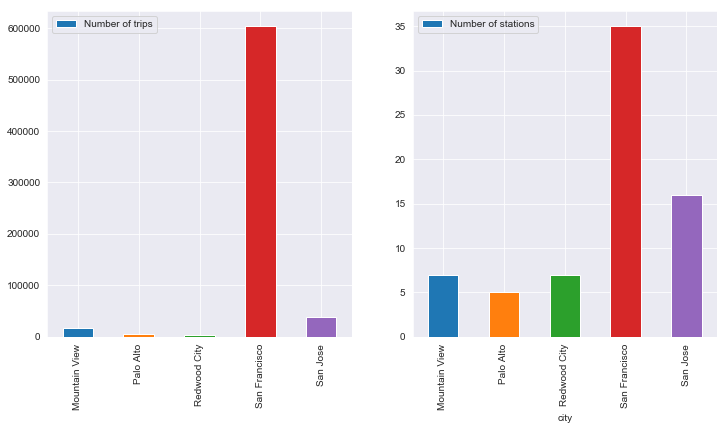

In [361]:
fig=plt.figure(figsize=(12,6))
ax = plt.axes()
plt.subplot(1,2,1)
same_city=trip.city==trip.city_end_station
trip[same_city]["city"].value_counts().sort_index().plot(kind='bar',legend=True,label="Number of trips")
plt.subplot(1,2,2)
stations.groupby('city').size().sort_index().plot(kind="bar",legend=True,label="Number of stations")

In [369]:
from bokeh.plotting import figure, output_file, show

In [370]:
output_file("test.html")
p = figure()
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

### What are the most popular stations?

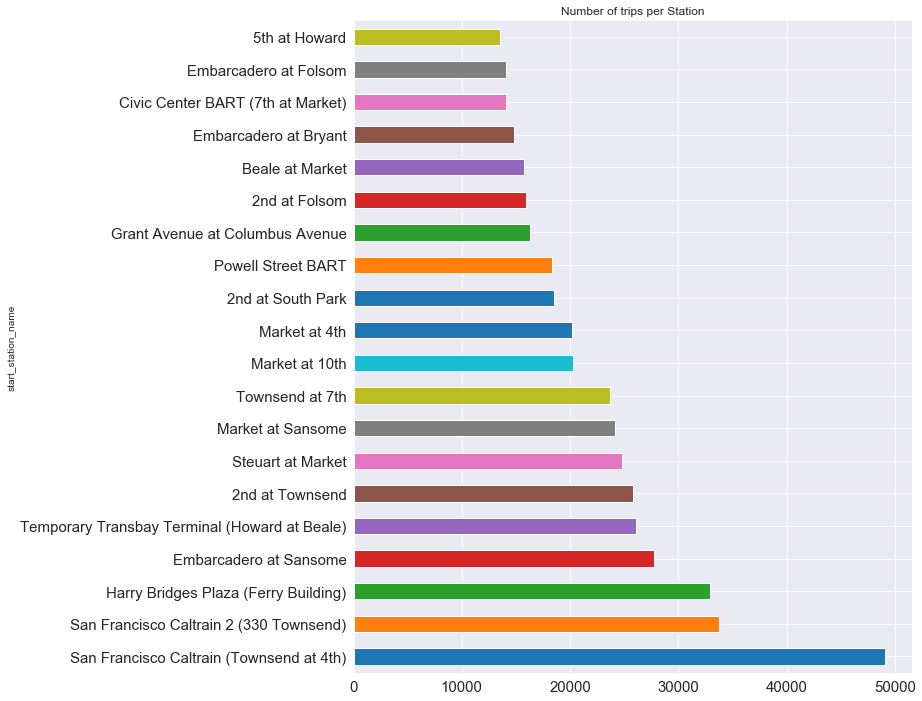

In [417]:
stationGroup=trip.groupby('start_station_name')
plt.figure(figsize=(10,12))

stationGroup.size().sort_values(ascending=False)[:20].plot(kind="barh", title="Number of trips per Station", fontsize=15)

### What are the most popular routes?

In [581]:
routes=pd.DataFrame(0, index=np.sort(trip.start_station_name.unique()), columns=np.sort(trip.end_station_name.unique()))
stations_id=trip[['start_station_name','end_station_name']]
for row in stations_id.iterrows():
    routes.loc[row[1]['start_station_name'],row[1]['end_station_name']]= routes.loc[row[1]['start_station_name'],row[1]['end_station_name']]+1
   

Text(0.5,1,'Popular Routes')

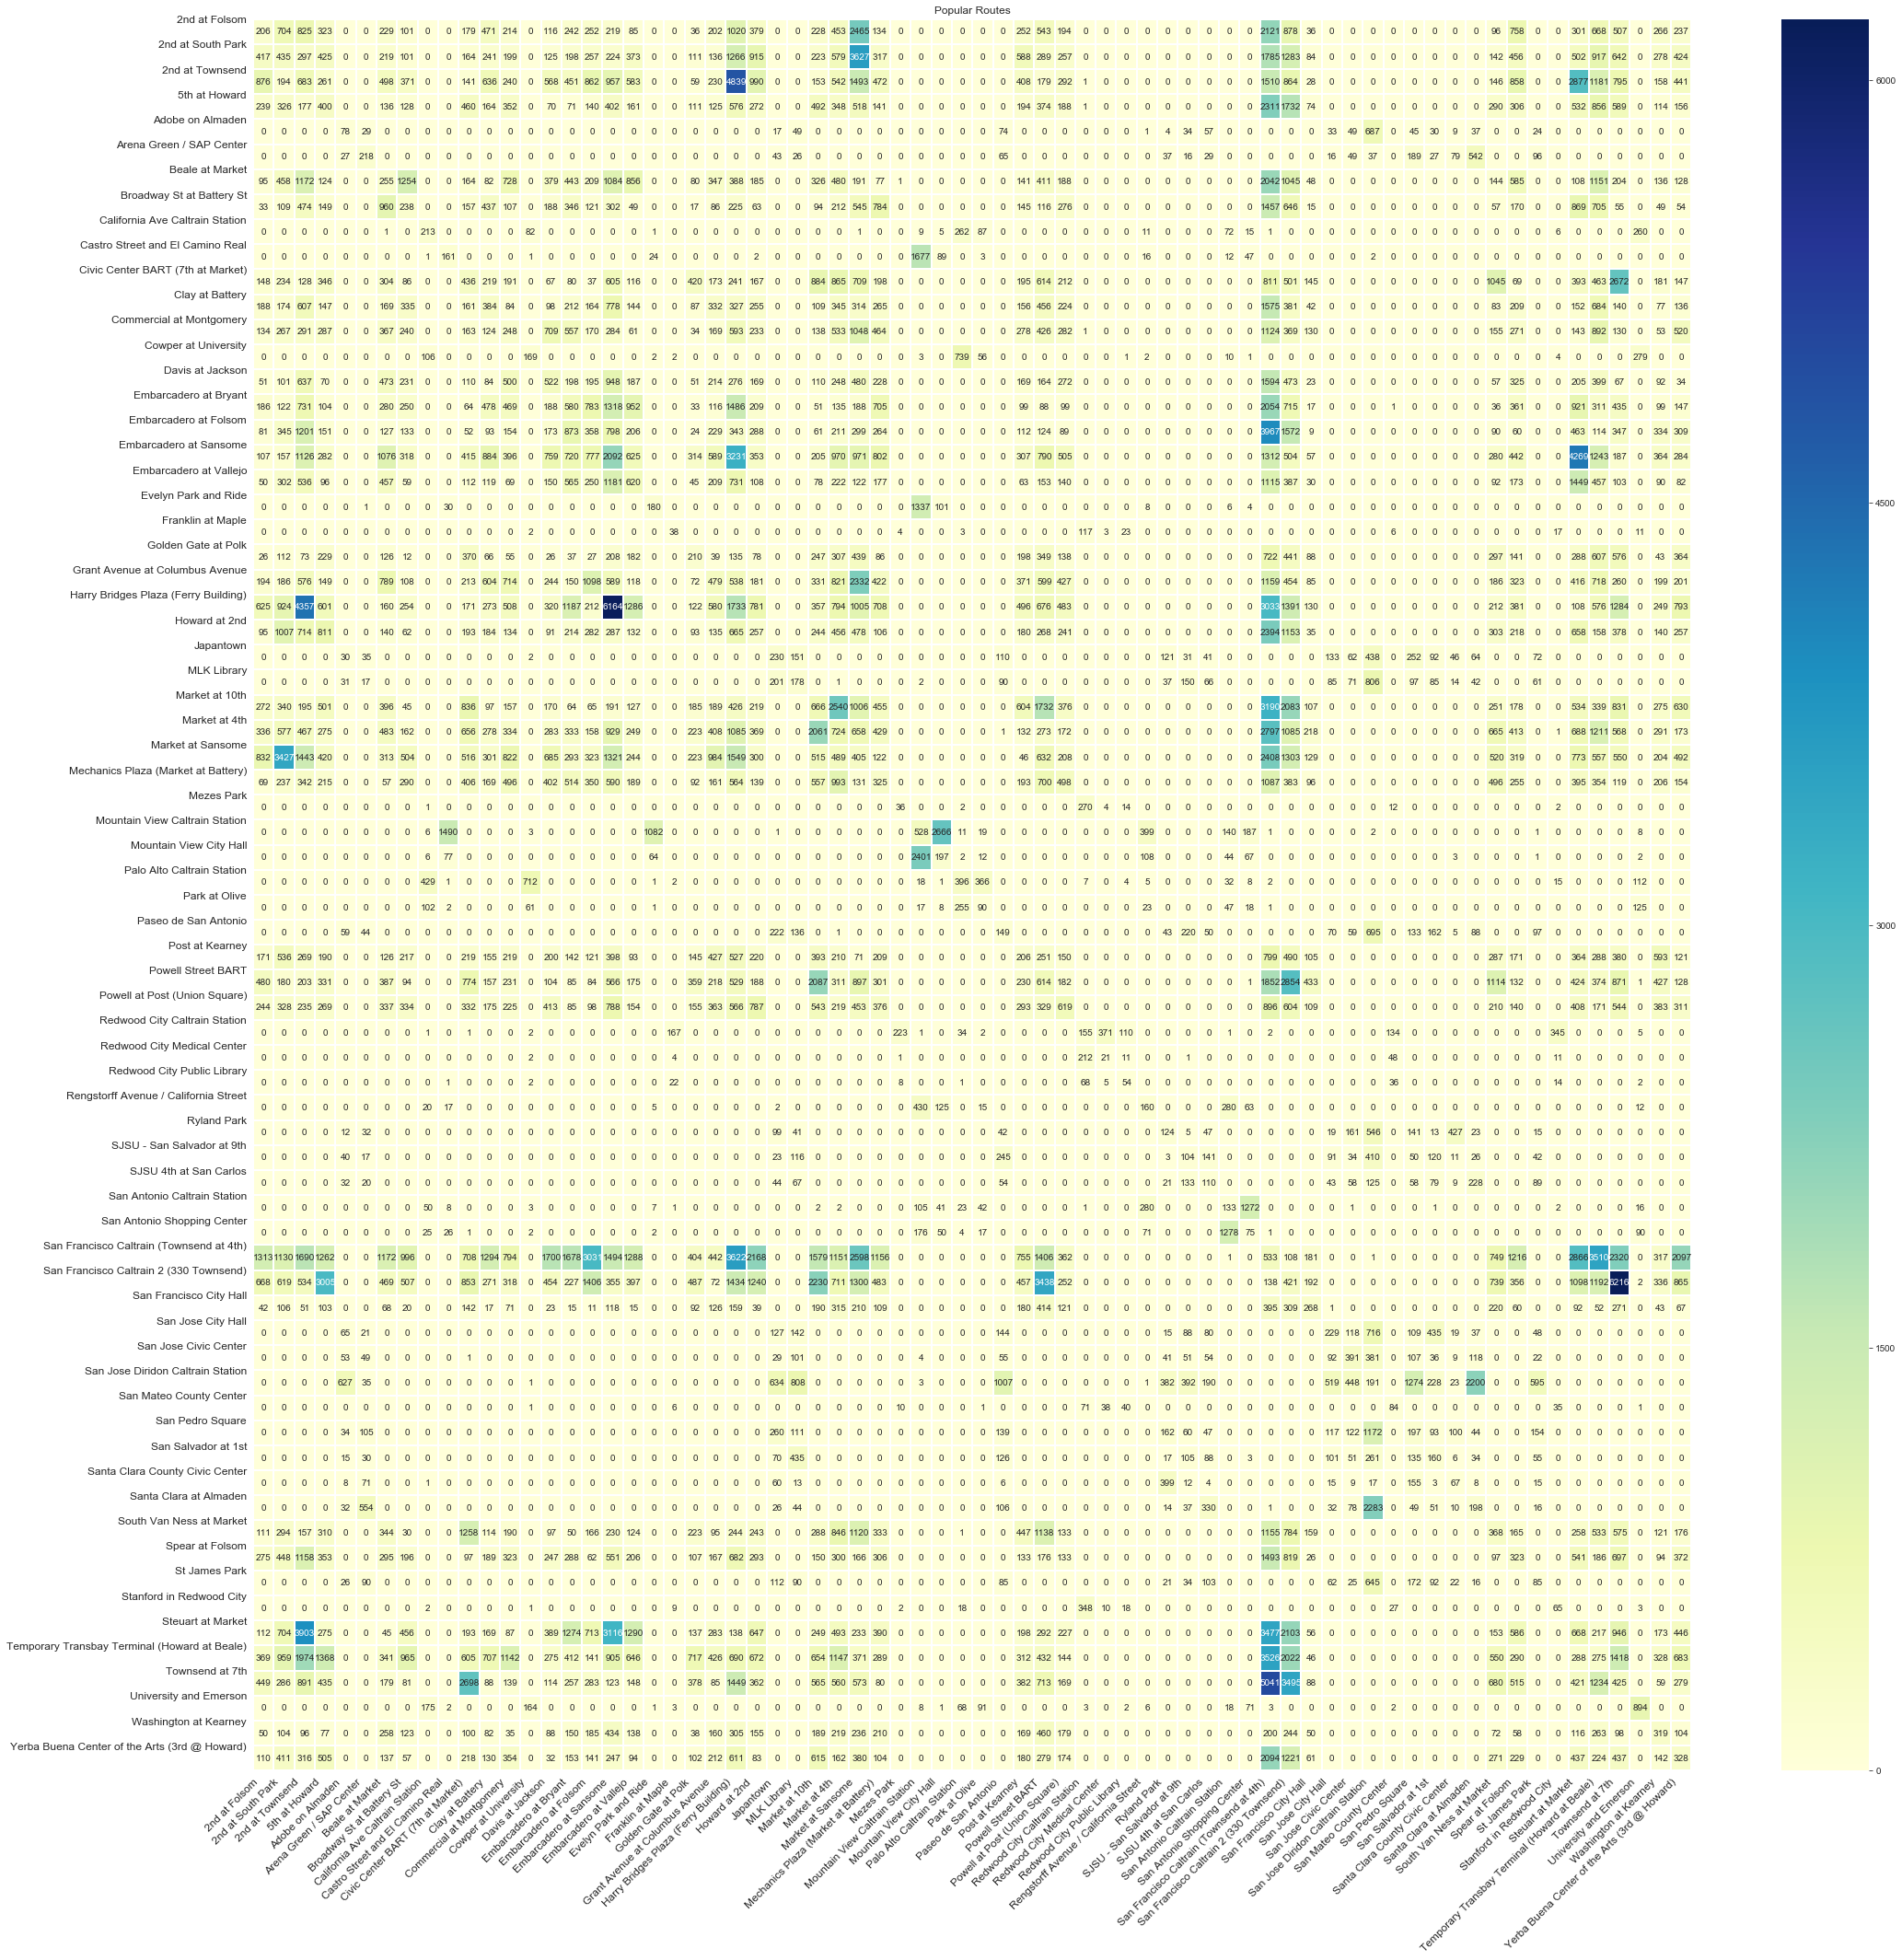

In [647]:
fig, ax= plt.subplots(figsize=(35,35))
ax = sns.heatmap(routes, cmap="YlGnBu", annot=True,linewidths=1,fmt="d")
ax.set_xticks(np.arange(len(routes.index)))
ax.set_yticks(np.arange(len(routes.columns)))
ax.set_xticklabels(routes.index, fontsize=12)
ax.set_yticklabels(routes.columns,fontsize=12)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Popular Routes")


In [583]:
routes.head()

2nd at Folsom  2nd at South Park  2nd at Townsend  \
2nd at Folsom                206                704              825   
2nd at South Park            417                435              297   
2nd at Townsend              876                194              683   
5th at Howard                239                326              177   
Adobe on Almaden               0                  0                0   

                   5th at Howard  Adobe on Almaden  Arena Green / SAP Center  \
2nd at Folsom                323                 0                         0   
2nd at South Park            425                 0                         0   
2nd at Townsend              261                 0                         0   
5th at Howard                400                 0                         0   
Adobe on Almaden               0                78                        29   

                   Beale at Market  Broadway St at Battery St  \
2nd at Folsom                  229                        101   
2nd at South Park              219                        101   
2nd at Townsend                498                        371   
5th at Howard                  136                        128   
Adobe on Almaden                 0                          0   

                   California Ave Caltrain Station  \
2nd at Folsom                                    0   
2nd at South Park                                0   
2nd at Townsend                                  0   
5th at Howard                                    0   
Adobe on Almaden                                 0   

                   Castro Street and El Camino Real  \
2nd at Folsom                                     0   
2nd at South Park                                 0   
2nd at Townsend                                   0   
5th at Howard                                     0   
Adobe on Almaden                                  0   

                   Civic Center BART (7th at Market)  Clay at Battery  \
2nd at Folsom                                    179              471   
2nd at South Park                                164              241   
2nd at Townsend                                  141              636   
5th at Howard                                    460              164   
Adobe on Almaden                                   0                0   

                   Commercial at Montgomery  Cowper at University  \
2nd at Folsom                           214                     0   
2nd at South Park                       199                     0   
2nd at Townsend                         240                     0   
5th at Howard                           352                     0   
Adobe on Almaden                          0                     0   

                   Davis at Jackson  Embarcadero at Bryant  \
2nd at Folsom                   116                    242   
2nd at South Park               125                    198   
2nd at Townsend                 568                    451   
5th at Howard                    70                     71   
Adobe on Almaden                  0                      0   

                   Embarcadero at Folsom  Embarcadero at Sansome  \
2nd at Folsom                        252                     219   
2nd at South Park                    257                     224   
2nd at Townsend                      862                     957   
5th at Howard                        140                     402   
Adobe on Almaden                       0                       0   

                   Embarcadero at Vallejo  Evelyn Park and Ride  \
2nd at Folsom                          85                     0   
2nd at South Park                     373                     0   
2nd at Townsend                       583                     0   
5th at Howard                         161                     0   
Adobe on Almaden                        0                     0   

                   

## Popular Days/ hours/ months for bike riding

### Popular Months

In [649]:
trip.head()

id  duration          start_date        start_station_name  \
0  4576        63 2013-08-29 14:13:00  South Van Ness at Market   
1  4607        70 2013-08-29 14:42:00        San Jose City Hall   
2  4130        71 2013-08-29 10:16:00   Mountain View City Hall   
3  4251        77 2013-08-29 11:29:00        San Jose City Hall   
4  4299        83 2013-08-29 12:02:00  South Van Ness at Market   

   start_station_id            end_date          end_station_name  \
0                66 2013-08-29 14:14:00  South Van Ness at Market   
1                10 2013-08-29 14:43:00        San Jose City Hall   
2                27 2013-08-29 10:17:00   Mountain View City Hall   
3                10 2013-08-29 11:30:00        San Jose City Hall   
4                66 2013-08-29 12:04:00            Market at 10th   

   end_station_id  bike_id subscription_type zip_code  duration_minutes  year  \
0              66      520        Subscriber    94127               1.0  2013   
1              10      661        Subscriber    95138               1.0  2013   
2              27       48        Subscriber    97214               1.0  2013   
3              10       26        Subscriber    95060               1.0  2013   
4              67      319        Subscriber    94103               2.0  2013   

   month        lat        long  dock_count           city  lat_end_station  \
0      8  37.774814 -122.418954          19  San Francisco        37.774814   
1      8  37.337391 -121.886995          15       San Jose        37.337391   
2      8  37.389218 -122.081896          15  Mountain View        37.389218   
3      8  37.337391 -121.886995          15       San Jose        37.337391   
4      8  37.774814 -122.418954          19  San Francisco        37.776619   

   long_end_station  dock_count_end_station city_end_station  
0       -122.418954                      19    San Francisco  
1       -121.886995                      15         San Jose  
2       -122.081896                      15    Mountain View  
3       -121.886995                      15         San Jose  
4       -122.417385                      27    San Francisco

### Number of trips by months

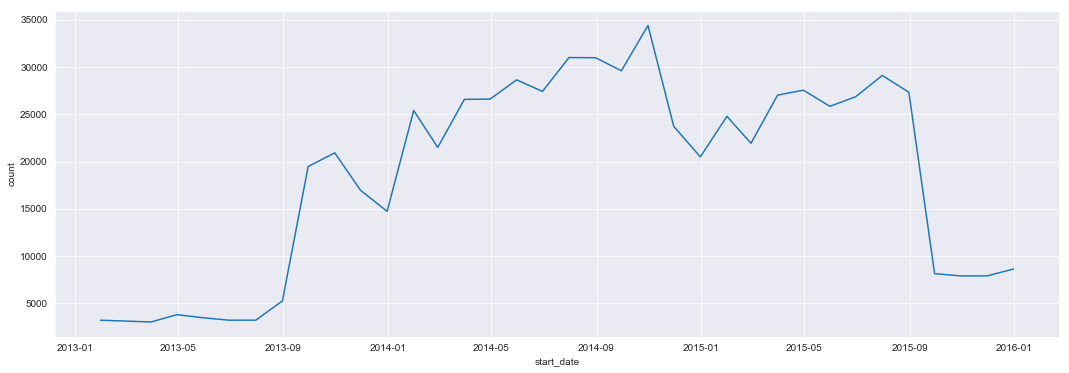

In [666]:
fig, ax = plt.subplots(figsize=(18, 6))
months=trip.resample('M',on="start_date").size().reset_index(name='count')
monthly_plot = sns.lineplot(data = months, x = 'start_date',  y = 'count',  ci=68)

### Weekdays vs. Weekend biking

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: start_date, dtype: object

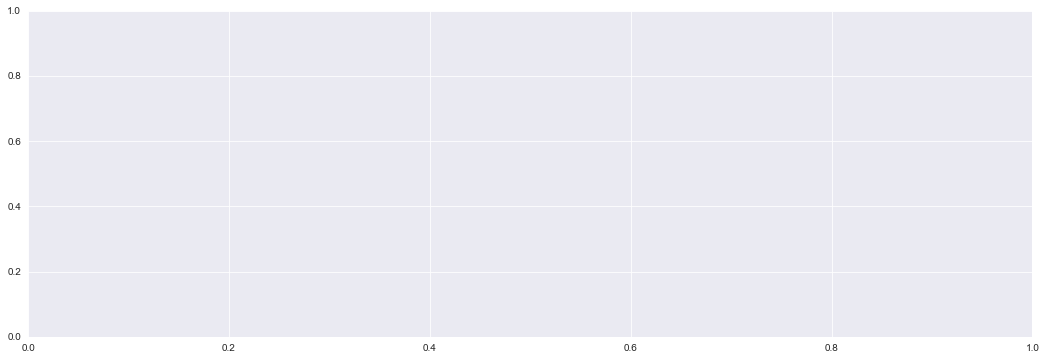

In [697]:
weekDays=trip["start_date"].dt.strftime('%A')


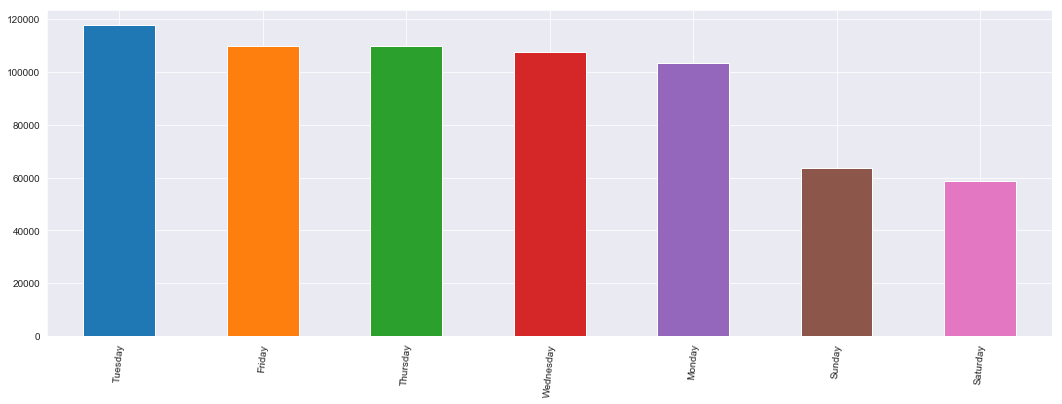

In [701]:
fig, ax = plt.subplots(figsize=(18, 6))
weekDays.value_counts().plot(kind="bar", rot=85)

### Peak Hours
#### We can see that majority of trips are in them morning between 6am to 10am and 16:00 to 19:00

In [717]:
time_count=trip["start_date"].dt.hour.value_counts().sort_index()
output_notebook()

Loading BokehJS ...

In [718]:
p = figure(title="Peak hours for riding the bikes", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Number of Trips'
p.line(time_count.index, time_count.values)
show(p)

In [733]:
trip["start_hour"]=trip["start_date"].dt.hour

In [743]:
trip.groupby(['start_station_name',"start_hour"]).size().unstack(level=-1, fill_value=0)

start_hour                                      0   1   2   3    4    5   \
start_station_name                                                         
2nd at Folsom                                   42  12   9   2  100  287   
2nd at South Park                               21  13   1   2    3   25   
2nd at Townsend                                 33  14   6   6   14   25   
5th at Howard                                   52  29  16  15    8  124   
Adobe on Almaden                                 1   2   0   1    1    0   
Arena Green / SAP Center                        57  18   1   0    0    6   
Beale at Market                                 40  21   4   6    2  203   
Broadway St at Battery St                       50  20   8   3   11   29   
California Ave Caltrain Station                  6   2   0   1    0    0   
Castro Street and El Camino Real                 1   3   3   0    0    5   
Civic Center BART (7th at Market)               47  30  19  13  115   82   
Clay at Battery                                 32  11  12  12    3   13   
Commercial at Montgomery                        57  24   8   9    3   10   
Cowper at University                             2   0   0   0    1    0   
Davis at Jackson                                36  13   9   2   12   80   
Embarcadero at Bryant                           39  15  18   9   33  305   
Embarcadero at Folsom                           21   9   6   0    1    8   
Embarcadero at Sansome                          96  35  21  21   14   88   
Embarcadero at Vallejo                          27  16  17   4    2    3   
Evelyn Park and Ride                             0   2   2   0    0   63   
Franklin at Maple                                1   0   1   0    0    2   
Golden Gate at Polk                             20  18   9   9    4   41   
Grant Avenue at Columbus Avenue                 76  60  28   6  222  633   
Harry Bridges Plaza (Ferry Building)            55  11  29  17    3   29   
Howard at 2nd                                   48  28  35  12   75   30   
Japantown                                       24  18  10   0    4    9   
MLK Library                                     13  11   4   1    2    2   
Market at 10th                                  62  40  48  10  145  123   
Market at 4th                                   91  49  17   5    6   11   
Market at Sansome                               97  50  19   6    2   42   
...                                            ...  ..  ..  ..  ...  ...   
Redwood City Caltrain Station                    9   3   2   0    1    3   
Redwood City Medical Center                      0   0   0   0    0    0   
Redwood City Public Library                      0   2   1   0    0    0   
Rengstorff Avenue / California Street            1   0   1   0    1    2   
Ryland Park                                      8   0   3   1    1    7   
SJSU - San Salvador at 9th                       8   1   8   0    0    3   
SJSU 4th at San Carlos                          21  10   2   3    0    2   
San Antonio Caltrain Station                     4  14   1   1    0    0   
San Antonio Shopping Center                      2   2   0   1    1    1   
San Francisco Caltrain (Townsend at 4th)       119  25  17   9   15  147   
San Francisco Caltrain 2 (330 Townsend)         96  18  23   7    3   57   
San Francisco City Hall                         21   8   7   2    5   10   
San Jose City Hall                              15   7   1   1    2    6   
San Jose Civic Center                            6  18   3   3    2   18   
San Jose Diridon Caltrain Station               44  74   2   0    1   11   
San Mateo County Center                          0   1   0   0    1    0   
San Pedro Square                                31  17   9   0    5    1   
San Salvador at 1st                             20  10   3   3    5   23   
Santa Clara County Civic Center                  0   0   0   0    0    0   
Santa Clara at Almaden                          